<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Exploring-the-variables-one-by-one" data-toc-modified-id="Exploring-the-variables-one-by-one-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring the variables one by one</a></span><ul class="toc-item"><li><span><a href="#Numeric-variables" data-toc-modified-id="Numeric-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Numeric variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Examing-the-missing-values" data-toc-modified-id="Examing-the-missing-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Examing the missing values</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Handling missing values</a></span><ul class="toc-item"><li><span><a href="#Missing-embarked" data-toc-modified-id="Missing-embarked-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Missing embarked</a></span></li></ul></li><li><span><a href="#Exploring-the-correlation-between-variables" data-toc-modified-id="Exploring-the-correlation-between-variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exploring the correlation between variables</a></span></li></ul></li><li><span><a href="#Categorical-variables-relation-with-target-variable" data-toc-modified-id="Categorical-variables-relation-with-target-variable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Categorical variables relation with target variable</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Splitting-in-train-and-testset" data-toc-modified-id="Splitting-in-train-and-testset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Splitting in train and testset</a></span></li><li><span><a href="#Different-classifiers" data-toc-modified-id="Different-classifiers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Different classifiers</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Support-vector-machines" data-toc-modified-id="Support-vector-machines-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Support vector machines</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Random forest</a></span></li></ul></li></ul></li></ul></div>

# Data exploration

## Loading the data

In [112]:
#libraries for exploration
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, Imputer, normalize
from scipy import stats

# plotting missing values
import missingno as msno

#plotting inline matplotlib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score

We load the data as a pandas dataframe and exampine the different features.

In [68]:
titanic = pd.read_csv("train_titanic.csv")

In [69]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We check whether the attributes have the correct types

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are records with Fare 0, we want to treat them as missing values so we replace them with NaN so that we can impute them later.

In [72]:
#replace zeroes with nan
titanic.Fare = titanic.Fare.map(lambda x: np.nan if x==0 else x)

We check if the types of the fields are right

In [73]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Split the variables in numberic and categorical. 

In [74]:
numeric_features = ["Age", "Fare"]
ordinal_features = ["Pclass", "SibSp", "Parch"]
nominal_features = ["Sex" , "Embarked"]
target = "Survived"

We encode the nominal features as category so that they get treated as such. For the ordinal ones this is not necessary as they are already treated as numerical and ordered.

In [75]:
#vectorized with apply
titanic[nominal_features] = titanic[nominal_features].apply(lambda x: x.astype("category"))

In [76]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

## Exploring the variables one by one

We now examine the variables per type. 

### Numeric variables

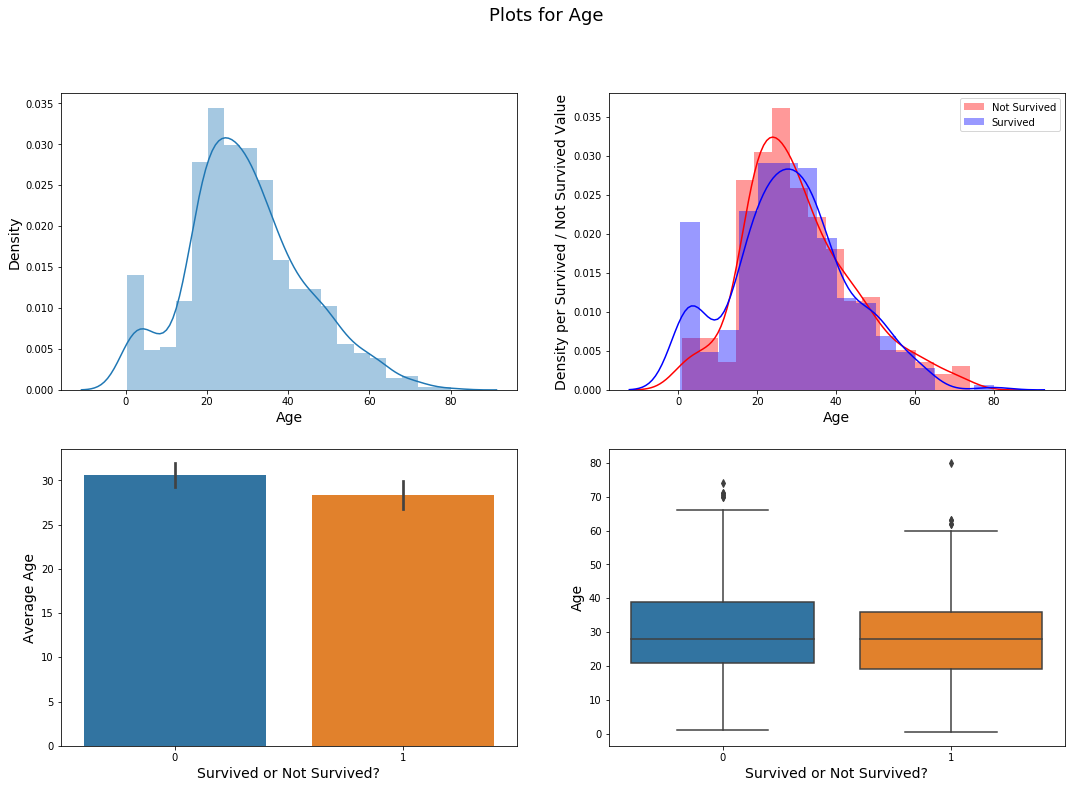

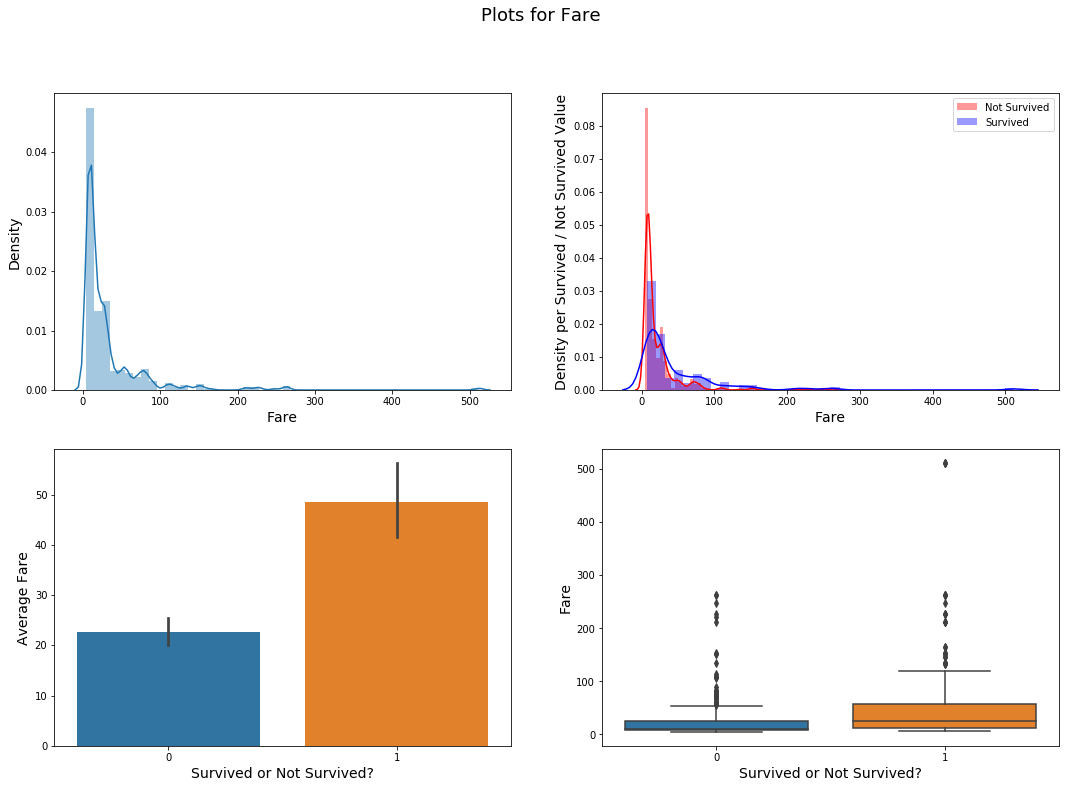

In [77]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(titanic[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(titanic.loc[titanic.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(titanic.loc[titanic.Survived==1, column].dropna(),
                 color='blue', label='Survived', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    
    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x=target, y=column, data=titanic, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x=target, y=column, data=titanic, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

    

### Categorical variables

## Examing the missing values

We use the missing_no package to visualise the missing values. We see that therer are only missing values in Age, Cabin and Embarked.

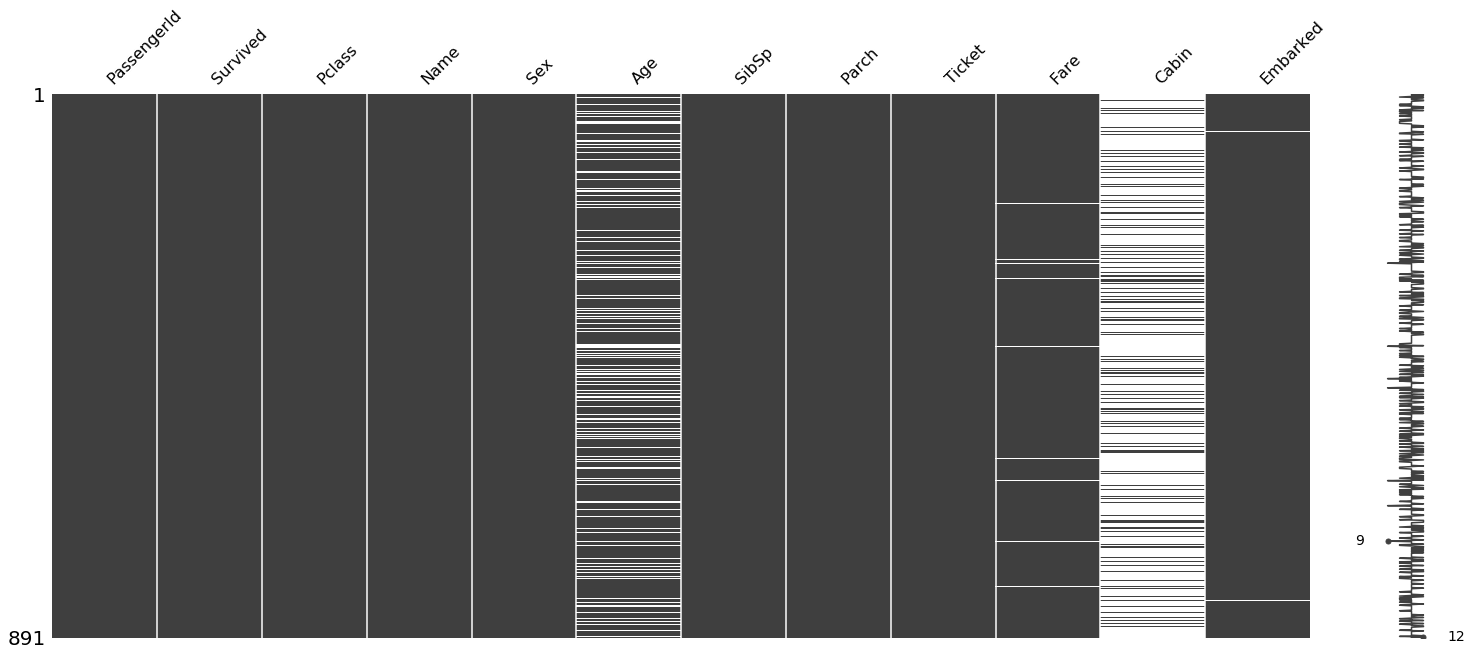

In [78]:
msno.matrix(titanic)

In [79]:
titanic.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         2
Fare            15
Age            177
Cabin          687
dtype: int64

Only age, cabin, fare  and embarked have missing values.

## Handling missing values

There are a lot of ages and cabins missing. We decide to impute age by the mean and cabin by "Unknown".

Age is not too skewed so we impute by the mean.

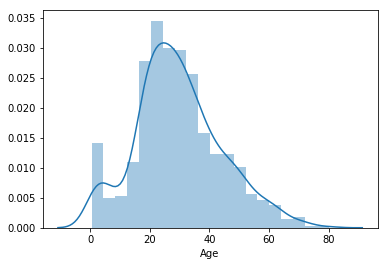

In [80]:
sns.distplot(titanic.Age.dropna())
plt.show()

In [81]:
titanic.Age= titanic.Age.fillna(titanic.Age.mean())

In [82]:
titanic.Cabin = titanic.Cabin.fillna('Unknown')

We see that all the missing Fares are Embarked at S. It seems reasonable that fare is dependent on where you embark and the class. 

In [83]:
titanic[np.isnan(titanic.Fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,NaN,Unknown,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,NaN,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,NaN,Unknown,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,NaN,Unknown,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,NaN,Unknown,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,NaN,Unknown,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,NaN,Unknown,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,NaN,Unknown,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,NaN,Unknown,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,NaN,Unknown,S


So we plot the fares for embarkment in Southampton per class. As it 's fairly skewed we decide to use median instead of mean.

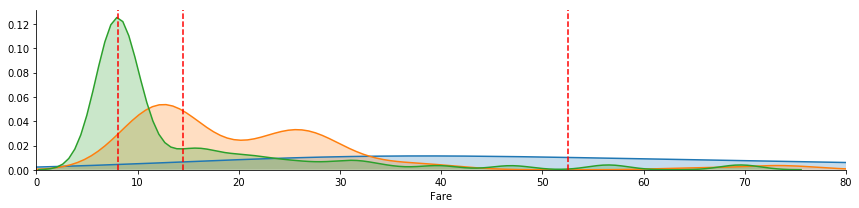

In [84]:
facet = sns.FacetGrid(titanic[~np.isnan(titanic.Fare) & (titanic.Embarked =='S')] , aspect=4, hue='Pclass')
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 80))


fare_median = titanic[(titanic['Embarked'] == 'S')].groupby(["Pclass"])['Fare'].median()
for x in fare_median:
    plt.axvline(x, ls='--', color ='r')
plt.show()

So we impute the Fare based on these medians:

In [85]:
titanic["Fare"] = titanic.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

### Missing embarked

There are two passengers where the embarked is missing. Like we did for fare we can try to derive where they embarked from their fare and class. Both passengers have the same class and the same Fare.

In [86]:
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We visualize fares per class and embarkment. We see that the most likely embarkment for the missing values is Charlottesville so we impute with "C".

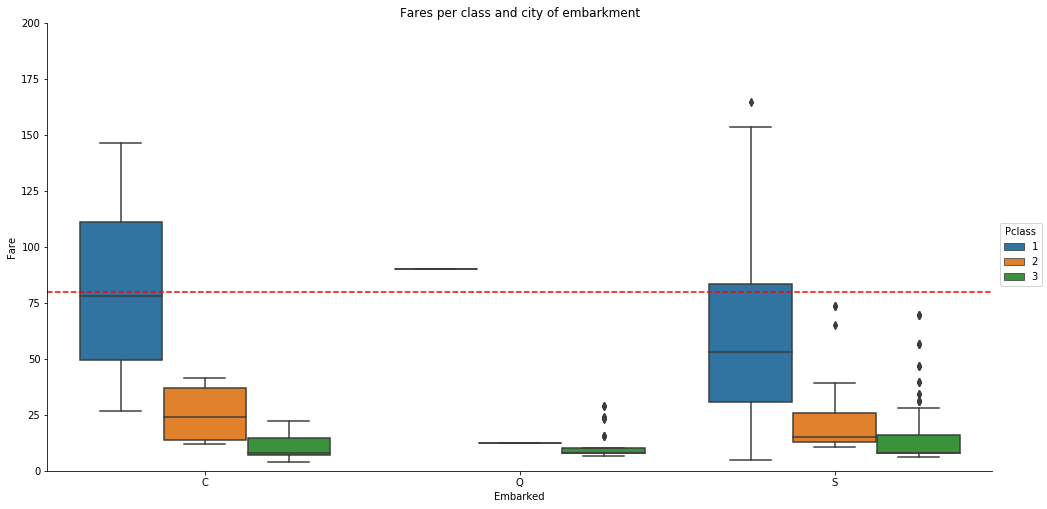

In [87]:
sns.factorplot(x='Embarked',y='Fare', hue='Pclass', kind="box",order=['C', 'Q', 'S'],data=titanic[~titanic.Embarked.isnull()], size = 7, aspect = 2,)
#limit y axis for 
plt.ylim(0,200)
plt.title("Fares per class and city of embarkment")

# Plot the fare of 80 they paid
plt.axhline(y=80, color='r', ls='--')
plt.show()

In [88]:
titanic.Embarked = titanic.Embarked.fillna('C')

No missing values are left!

In [89]:
titanic.isnull().sum().sort_values()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Exploring the correlation between variables

We now explore the correlation between the variables to see which ones we should consider for the models. We do this by generating a correlation matrix. We see that class and fare are negatively correlated, as we also noticed when we were imputing the null values.

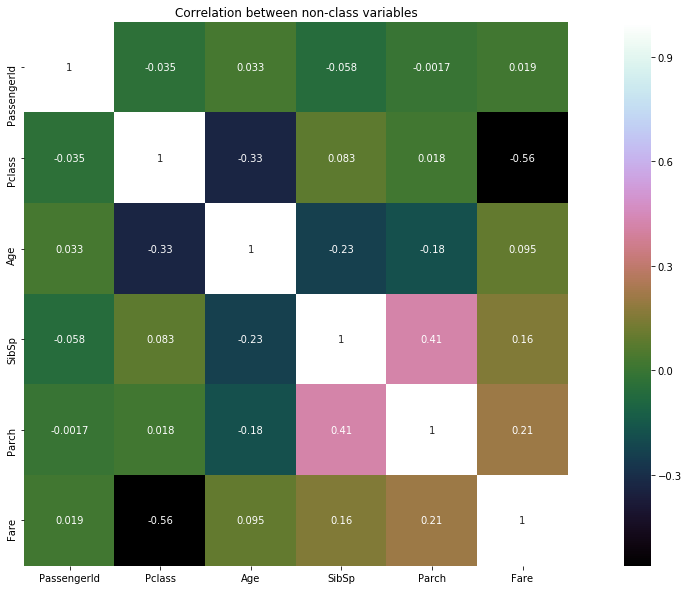

In [90]:
# GETTING Correllation matrix
corr_mat=titanic.drop([target], axis =1).corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.title("Correlation between non-class variables")
plt.show()

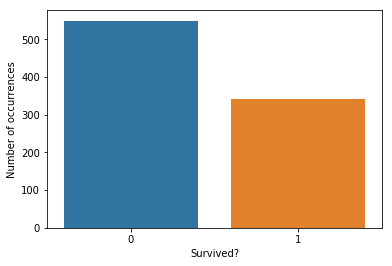

In [91]:
### Target variable exploration

sns.countplot(titanic.Survived);
plt.xlabel('Survived?');
plt.ylabel('Number of occurrences');
plt.show()

# Categorical variables relation with target variable

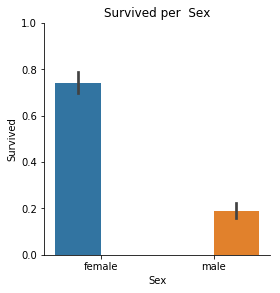

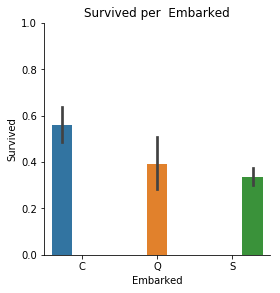

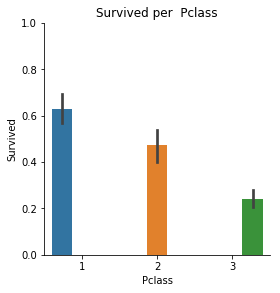

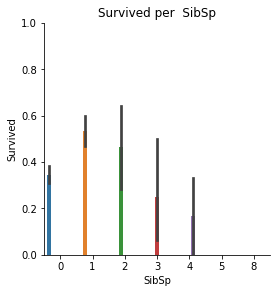

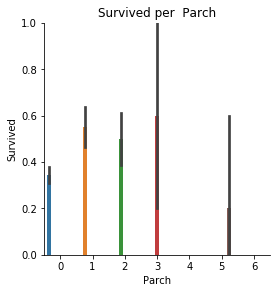

In [92]:
for x in nominal_features + ordinal_features:
    sns.factorplot(x=x, y='Survived', hue=x, kind="bar", data=titanic)
    plt.ylim(0,1)
    plt.title("Survived per  {}".format(x))
    plt.show()

We see that females had way higher survival rate, as did people with higher class.

# Classification

## Splitting in train and testset

We drop Name, cabin and ticket as columns and need to convert the categorical types to numerical. 

In [93]:
# drop useless columns
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)

In [94]:
titanic = pd.get_dummies(titanic, columns=nominal_features)

In [113]:
norm_titanic = normalize(titanic.drop([target]))

ValueError: labels ['Survived'] not contained in axis

We split the dataset in a test and trainset. Our testset size is 40%.

In [95]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(titanic.drop([target], axis=1), titanic[target], test_size=0.4)


In [96]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,6,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [97]:
Y.head()

NameError: name 'Y' is not defined

## Different classifiers

center and scale!!!

In [98]:
models=[]
train_error =[]
test_error=[]

### Logistic regression

### Support vector machines

### Random forest

In [99]:
#RandomForest
model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
model1.fit(X_train, y_train)
output = model1.predict(X_test)

print(output)


[0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0]


In [100]:
#SVM
model2 = SVC(kernel='rbf', gamma=1/2 , C=1.0,class_weight='balanced', 
         random_state=0,probability=True) #loss='squared_hinge'
model2.fit(X_train, y_train)
output = model2.predict(X_test)

In [101]:
#Logistic Regression
model3 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
model3.fit(X_train, y_train)
output = model3.predict(X_test)

In [102]:
#KNN
model5 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
model5.fit(X_train, y_train)
output = model5.predict(X_test)

10-fold cross validation:

ROC AUC: 0.86 (+/- 0.03) [Random Forest]
ROC AUC: 0.58 (+/- 0.07) [SVM]
ROC AUC: 0.73 (+/- 0.09) [Logistic Regression]
ROC AUC: 0.57 (+/- 0.06) [KNN]


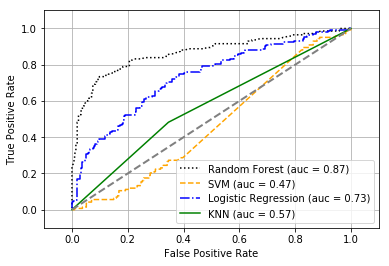

In [108]:
all_clf = [model1, model2, model3,model5]
print('10-fold cross validation:\n')

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(
        estimator=clf,
        X=X_train,
        y=y_train,
        cv=10,
        scoring='roc_auc',
    )
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

clf_labels = [
'Random Forest',
'SVM',
'Logistic Regression',
'KNN',
]

from sklearn.metrics import roc_curve, auc
colors = ['black', 'orange', 'blue', 'green','pink']
linestyles = [':', '--', '-.', '-','-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(
        fpr,
        tpr,
        color=clr,
        linestyle=ls,
        label='%s (auc = %0.2f)' % (label, roc_auc)
    )
plt.legend(loc='lower right')
plt.plot(
[0, 1],
[0, 1],
linestyle='--',
color='gray',
linewidth=2,
)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()